In [1]:
# Import Libraries

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag, RegexpParser
from nltk.chunk.api import ChunkParserI
from nltk.corpus import stopwords
from nltk import FreqDist
import nltk
import re
import os
from IPython.display import Image, display
from nltk.draw import TreeWidget
from nltk.draw.util import CanvasFrame
import subprocess
from nltk.book import text8

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
# Word Tokenization

f = open("story.txt", "r")
text = f.read()

print(sent_tokenize(text))


["I like this movie, it's funny.", 'I hate this movie.', 'This was awesome!', 'I like it.', 'Nice one.', 'I love it.']


In [3]:
# Word Tokenization

print(word_tokenize(text))

['I', 'like', 'this', 'movie', ',', 'it', "'s", 'funny', '.', 'I', 'hate', 'this', 'movie', '.', 'This', 'was', 'awesome', '!', 'I', 'like', 'it', '.', 'Nice', 'one', '.', 'I', 'love', 'it', '.']


In [4]:
# Lower Case Conversion

text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
words = text.split()
print(words)

['i', 'like', 'this', 'movie', 'it', 's', 'funny', 'i', 'hate', 'this', 'movie', 'this', 'was', 'awesome', 'i', 'like', 'it', 'nice', 'one', 'i', 'love', 'it']


In [5]:
# Stop Word

f = open("story.txt")
text = f.read()

stop_words = set(stopwords.words("english"))
words_in_quote = word_tokenize(text)

filtered_list = [word for word in words_in_quote if word.casefold() not in stop_words]
filtered_list = []

for word in words_in_quote:
    if word.casefold() not in stop_words:
        filtered_list.append(word)
        

print(filtered_list)

['like', 'movie', ',', "'s", 'funny', '.', 'hate', 'movie', '.', 'awesome', '!', 'like', '.', 'Nice', 'one', '.', 'love', '.']


In [6]:
# Stemming

stemmer = PorterStemmer()
f = open("story.txt")
text = f.read()

words = word_tokenize(text)
stemmed_words = [stemmer.stem(word) for word in words]

print(stemmed_words)

['i', 'like', 'thi', 'movi', ',', 'it', "'s", 'funni', '.', 'i', 'hate', 'thi', 'movi', '.', 'thi', 'wa', 'awesom', '!', 'i', 'like', 'it', '.', 'nice', 'one', '.', 'i', 'love', 'it', '.']


In [7]:
# Lemmatization

lemmatizer = WordNetLemmatizer()

words = word_tokenize(text)
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

print(lemmatized_words)

['I', 'like', 'this', 'movie', ',', 'it', "'s", 'funny', '.', 'I', 'hate', 'this', 'movie', '.', 'This', 'wa', 'awesome', '!', 'I', 'like', 'it', '.', 'Nice', 'one', '.', 'I', 'love', 'it', '.']


In [8]:
# Chunking

words = word_tokenize(text)
lotr_pos_tags = nltk.pos_tag(words)
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunk_parser = nltk.RegexpParser(grammar)
tree = chunk_parser.parse(lotr_pos_tags)

tree.draw()


In [9]:
# Chinking

words = word_tokenize(text)
lotr_pos_tags = nltk.pos_tag(words)
grammar = """
    Chunk: {<.*>+}
           }<JJ>{"""
chunk_parser = nltk.RegexpParser(grammar)

tree = chunk_parser.parse(lotr_pos_tags)
tree.draw()

In [10]:
# Using Named Entity Recognition (NER)

f = open("story.txt")

def extract_ne(text):
    words = word_tokenize(text)
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    tree.draw()
#     return set(
#        " ".join(i[0] for i in t)
#        for t in tree
#        if hasattr(t, "label") and t.label() == "NE"
#     )
    


text = f.read()
extract_ne(text)

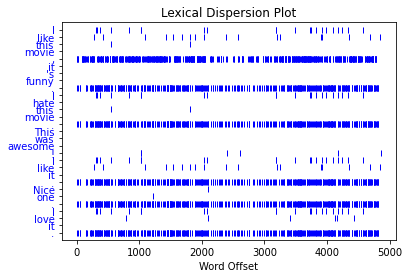

In [11]:
# Making a Dispersion Plot

f = open("story.txt")
text = f.read()
words = word_tokenize(text)
text8.dispersion_plot(words)

# text8.dispersion_plot(["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy"])

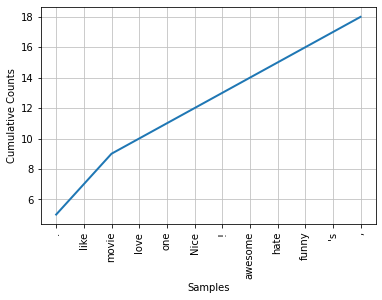

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [12]:
# Making a Frequency Distribution

meaningful_words = [word for word in words if word.casefold() not in stop_words]
frequency_distribution = FreqDist(meaningful_words)
frequency_distribution.plot(20, cumulative=True)

In [13]:
# Parse tree or Syntax Tree generation

f = open("story.txt")
text = f.read()
tagged = pos_tag(word_tokenize(text))
chunker = RegexpParser(""" 
NP: {<.*>*}   
}<[\.VI].*>+{       
<.*>}{<DT>        
PP: {<IN><NP>}        
VP: {<VB.*><NP|PP>*}
""" )
output = chunker.parse(tagged)
print(output)


(S
  (NP I/PRP)
  (VP like/VBP (NP this/DT movie/NN ,/, it/PRP))
  (VP 's/VBZ (NP funny/JJ))
  ./.
  (NP I/PRP)
  (VP hate/VBP (NP this/DT movie/NN))
  ./.
  (NP This/DT)
  (VP was/VBD (NP awesome/JJ))
  !/.
  (NP I/PRP)
  (PP like/IN (NP it/PRP))
  ./.
  (NP Nice/NNP one/CD)
  ./.
  (NP I/PRP)
  (VP love/VBP (NP it/PRP))
  ./.)


In [14]:
# Parse tree or Syntax Tree generation

output.draw()

In [15]:
# POS Tagging

f = open("story.txt")
text = f.read()
stop_words = set(stopwords.words('english'))
tokenized = sent_tokenize(text)

for i in tokenized:
    wordsList = nltk.word_tokenize(i)
    wordsList = [w for w in wordsList if not w in stop_words]
    tagged = nltk.pos_tag(wordsList)
    print(tagged)

[('I', 'PRP'), ('like', 'VBP'), ('movie', 'NN'), (',', ','), ("'s", 'POS'), ('funny', 'NN'), ('.', '.')]
[('I', 'PRP'), ('hate', 'VBP'), ('movie', 'NN'), ('.', '.')]
[('This', 'DT'), ('awesome', 'NN'), ('!', '.')]
[('I', 'PRP'), ('like', 'VBP'), ('.', '.')]
[('Nice', 'NNP'), ('one', 'CD'), ('.', '.')]
[('I', 'PRP'), ('love', 'VBP'), ('.', '.')]
